In [1]:
import pandas as pd
import numpy as np
import os
import ast
from multiprocessing import Pool

print("Pandas version: ", pd.__version__)

Pandas version:  1.4.4


## Read CSV with sessions

In [2]:
# Загрузка файлов и объединение в один датафрейм.


if len(df_list) > 1:
    df_sessions = pd.concat(df_list)
else:
    df_sessions = df_list[0]

print(df_sessions.shape)

NameError: name 'df_list' is not defined

In [4]:
#print("First 5 rows:")
#df_sessions.head()

## Проверки и очистка

In [5]:
# Удаление строк с пустыми значениями.

print("Droping rows with empty values...")
df_sessions.dropna(inplace=True)
print("Shape:", df_sessions.shape)
# print("Deleted: ", current_shape[0] - df_sessions.shape[0])

Droping rows with empty values...


NameError: name 'df_sessions' is not defined

In [ ]:
# Проверка на пустые значения.

print("Number of empty values:")
#print(df_sessions.isna().sum())
current_shape = df_sessions.shape
#print("Shape:", current_shape)

Number of empty values:
src_ip                     0
sport                      0
dst_ip                     0
dport                      0
proto                      0
packets_count              0
start_time                 0
end_time                   0
duration                   0
total_fiat                 0
total_biat                 0
iat_list                   0
direction_list             0
pkt_len_list               0
f_pkts_num                 0
b_pkts_num                 0
min_fiat                   0
max_fiat                   0
min_biat                   0
max_biat                   0
mean_fiat                  0
mean_biat                  0
flow_packets_per_second    0
flow_bytes_per_second      0
f_min_pkt_size             0
f_max_pkt_size             0
f_mean_pkt_size            0
b_min_pkt_size             0
b_max_pkt_size             0
b_mean_pkt_size            0
is_closed                  0
last_packet_time           0
diag_fiat                  0
diag_step_fiat     

In [ ]:
# Корректируем тип данных в некоторых столбцах.

print("Correcting data types...")

df_sessions['sport'] = df_sessions['sport'].astype('int64')
df_sessions['dport'] = df_sessions['dport'].astype('int64')
df_sessions['proto'] = df_sessions['proto'].astype('int64')
df_sessions['f_min_pkt_size'] = df_sessions['f_min_pkt_size'].astype('int64')
df_sessions['b_min_pkt_size'] = df_sessions['b_min_pkt_size'].astype('int64')

Correcting data types...


In [ ]:
# Проверяем сколько сессий в которых только 1 пакет для UDP и только Handshake (или не законченный handshake) для TCP.

print('TCP packets (handshake only)', df_sessions[(df_sessions.packets_count <= 3) & (df_sessions.proto == 6)].shape)
print('UDP sessions with only 1 packet', df_sessions.query('packets_count == 1 & proto == 17').shape)

TCP packets (handshake only) (0, 50)
UDP sessions with only 1 packet (0, 50)


In [ ]:
# Собственно сам дроп сессий.

print("Droping above sessions...")
df_sessions.reset_index(drop=True, inplace=True)
df_sessions.drop(index=df_sessions.query('packets_count <= 3 & proto == 6').index, inplace=True)
df_sessions.drop(index=df_sessions.query('packets_count == 1 & proto == 17').index, inplace=True)

Droping above sessions...


In [ ]:
# Делаем массив в колонках с данными для графиков.

print("Making arrays in columns...")

df_sessions['diag_fiat'] = df_sessions['diag_fiat'].apply(ast.literal_eval)
df_sessions['diag_biat'] = df_sessions['diag_biat'].apply(ast.literal_eval)
df_sessions['diag_total'] = df_sessions['diag_total'].apply(ast.literal_eval)
df_sessions['iat_list'] = df_sessions['iat_list'].apply(ast.literal_eval)
df_sessions['pkt_len_list'] = df_sessions['pkt_len_list'].apply(ast.literal_eval)
df_sessions['direction_list'] = df_sessions['direction_list'].apply(ast.literal_eval)
df_sessions['ip_ttl_list'] = df_sessions['ip_ttl_list'].apply(ast.literal_eval)
df_sessions['tcp_win_list'] = df_sessions['tcp_win_list'].apply(ast.literal_eval)

df_sessions.shape

Making arrays in columns...


(2335, 50)

In [ ]:
print('iat_list:', df_sessions['iat_list'].describe())
print('len_list:', df_sessions['pkt_len_list'].describe())
print('dir_list:', df_sessions['direction_list'].describe())
print('ip_ttl_list:', df_sessions['ip_ttl_list'].describe())
print('tcp_win_list:', df_sessions['tcp_win_list'].describe())

iat_list: count                                                  2335
unique                                                 2335
top       (0.0, 0.30533599853515625, 3.910064697265625e-...
freq                                                      1
Name: iat_list, dtype: object
len_list: count                                                2335
unique                                                 65
top       (74, 66, 54, 571, 3190, 54, 134, 133, 133, 269)
freq                                                  481
Name: pkt_len_list, dtype: object
dir_list: count                                   2335
unique                                    20
top       (1, -1, 1, 1, -1, 1, 1, -1, -1, 1)
freq                                    1250
Name: direction_list, dtype: object
ip_ttl_list: count                                         2335
unique                                          44
top       (64, 99, 64, 64, 99, 64, 64, 99, 99, 64)
freq                                           475
N

In [ ]:
iat_list_minlen = df_sessions['iat_list'].apply(lambda x: len(x)).min()
iat_list_maxlen = df_sessions['iat_list'].apply(lambda x: len(x)).max()
len_list_minlen = df_sessions['pkt_len_list'].apply(lambda x: len(x)).min()
len_list_maxlen = df_sessions['pkt_len_list'].apply(lambda x: len(x)).max()
dir_list_minlen = df_sessions['direction_list'].apply(lambda x: len(x)).min()
dir_list_maxlen = df_sessions['direction_list'].apply(lambda x: len(x)).max()
ip_ttl_list_minlen = df_sessions['ip_ttl_list'].apply(lambda x: len(x)).min()
ip_ttl_list_maxlen = df_sessions['ip_ttl_list'].apply(lambda x: len(x)).max()
tcp_win_list_minlen = df_sessions['tcp_win_list'].apply(lambda x: len(x)).min()
tcp_win_list_maxlen = df_sessions['tcp_win_list'].apply(lambda x: len(x)).max()

print('iat_list_minlen:', iat_list_minlen)
print('iat_list_maxlen:', iat_list_maxlen)
print('len_list_minlen:', len_list_minlen)
print('len_list_maxlen:', len_list_maxlen)
print('dir_list_minlen:', dir_list_minlen)
print('dir_list_maxlen:', dir_list_maxlen)
print('ip_ttl_list_minlen:', ip_ttl_list_minlen)
print('ip_ttl_list_maxlen:', ip_ttl_list_maxlen)
print('tcp_win_list_minlen:', tcp_win_list_minlen)
print('tcp_win_list_maxlen:', tcp_win_list_maxlen)

iat_list_minlen: 10
iat_list_maxlen: 10
len_list_minlen: 10
len_list_maxlen: 10
dir_list_minlen: 10
dir_list_maxlen: 10
ip_ttl_list_minlen: 10
ip_ttl_list_maxlen: 10
tcp_win_list_minlen: 10
tcp_win_list_maxlen: 10


In [ ]:
df_sessions[df_sessions['pkt_len_list'].str.len() > 1024]['packets_count'].sort_values()

Series([], Name: packets_count, dtype: int64)

In [ ]:
len(df_sessions['pkt_len_list'][366])

10

In [ ]:
df_sessions.reset_index(drop=True, inplace=True)

In [ ]:
# Разворачиваем массивы в колонках с данными для диаграмм в отдельные колонки.

print("Unpacking arrays in columns ... (may take up to 10 minutes)")

df_pktiat = pd.DataFrame(df_sessions['iat_list'].to_list(), columns=[f'pktiat_{i}' for i in np.arange(0, iat_list_maxlen, 1)])
df_pktlen = pd.DataFrame(df_sessions['pkt_len_list'].to_list(), columns=[f'pktlen_{i}' for i in np.arange(0, len_list_maxlen, 1)])
df_pktdir = pd.DataFrame(df_sessions['direction_list'].to_list(), columns=[f'pktdir_{i}' for i in np.arange(0, dir_list_maxlen, 1)])
df_ip_ttl = pd.DataFrame(df_sessions['ip_ttl_list'].to_list(), columns=[f'ip_ttl_{i}' for i in np.arange(0, ip_ttl_list_maxlen, 1)])
df_tcp_win = pd.DataFrame(df_sessions['tcp_win_list'].to_list(), columns=[f'tcp_win_{i}' for i in np.arange(0, tcp_win_list_maxlen, 1)])

df_sessions = pd.concat([
        df_sessions,
        df_pktiat,
        df_pktlen,
        #df_pktdir,
        #df_ip_ttl,
        #df_tcp_win,
        ], axis=1)

Unpacking arrays in columns ... (may take up to 10 minutes)


In [ ]:
print('df_sessions.shape:', df_sessions.shape)
print('df_pktiat.shape:', df_pktiat.shape)
print('df_pktlen.shape:', df_pktlen.shape)
print('df_pktdir.shape:', df_pktdir.shape)
print('df_ip_ttl.shape:', df_ip_ttl.shape)
print('df_tcp_win.shape:', df_tcp_win.shape)

df_sessions.shape: (2335, 100)
df_pktiat.shape: (2335, 10)
df_pktlen.shape: (2335, 10)
df_pktdir.shape: (2335, 10)
df_ip_ttl.shape: (2335, 10)
df_tcp_win.shape: (2335, 10)


In [ ]:
print('Dropping columns with arrays...')

df_sessions.drop(columns=['iat_list', 'pkt_len_list', 'direction_list', 'ip_ttl_list', 'tcp_win_list'], axis=1, inplace=True)
print('df_sessions.shape:', df_sessions.shape)

Dropping columns with arrays...
df_sessions.shape: (2335, 95)


## Разведочный анализ данных (EDA)

In [ ]:
# Проверим что осталось и как с этим быть
print(df_sessions.columns.to_list())

['src_ip',
 'sport',
 'dst_ip',
 'dport',
 'proto',
 'packets_count',
 'start_time',
 'end_time',
 'duration',
 'total_fiat',
 'total_biat',
 'f_pkts_num',
 'b_pkts_num',
 'min_fiat',
 'max_fiat',
 'min_biat',
 'max_biat',
 'mean_fiat',
 'mean_biat',
 'flow_packets_per_second',
 'flow_bytes_per_second',
 'f_min_pkt_size',
 'f_max_pkt_size',
 'f_mean_pkt_size',
 'b_min_pkt_size',
 'b_max_pkt_size',
 'b_mean_pkt_size',
 'is_closed',
 'last_packet_time',
 'diag_fiat',
 'diag_step_fiat',
 'diag_biat',
 'diag_step_biat',
 'diag_total',
 'diag_steps',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_psh_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'f_iat_list',
 'b_iat_list',
 'tcp_hs_skipped',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktiat_3',
 'pktiat_4',
 'pktiat_5',
 'pktiat_6',
 'pktiat_7',
 'pktiat_8',
 'pktiat_9',
 'pktlen_0',
 'pktlen_1',
 'pktlen_2',
 'pktlen_3',
 'pktlen_4',
 'pktlen_5',
 'pktlen_6',
 'pktlen_7',
 'pktlen_8',
 'pktlen_9',
 'pktdir_0',

### Проверка на выбросы

In [ ]:
# Извлечем всечисловые признаки
num_columns = ['int16','int32','int64','float16','float32','float64']
numerical_columns = list(df_sessions.select_dtypes(include=num_columns).columns)
df_sessions_numerical = df_sessions[numerical_columns]
 

In [ ]:
# Удалим NaN
df_sessions_numerical.dropna(axis=1,inplace=True)

/tmp/ipykernel_16900/1764849278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions_numerical.dropna(axis=1,inplace=True)


In [ ]:
# Мат. паеты
import numpy as np
import scipy.stats as stats

In [ ]:
# Определение выбросов по методу Гиббса

def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    # print("Grubbs Calculated Value", x, g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    # print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        # print("Из теста Гиббса мы видим, что вычисленное значение меньше критического значения, принимаем нулевую гипотезу и делаем вывод об отсутствии выбросов\n")
        return False
    else:
        # print("Из теста Гиббса мы видим, что вычисленное значение больше критического значения, отклоняем нулевую гипотезу и делаем вывод, что есть выбросы\n")
        return True


In [ ]:
def get_outliers(in_df):
    outliers_features = []
    for i in range(len(in_df.columns)):
        if grubbs_test(in_df[in_df.columns[i]]):
            outliers_features.append(in_df.columns[i]) 

    print("Признаки, содержащие выбросы:", outliers_features)
    print("Всего:", len(outliers_features))
    return outliers_features


In [ ]:
# Функция удаления выбросов (если это надо):
# [Параметры]
#   in_df - dataframe для удаления выбросов
#   in_feature - признак, выбросы которого удаляются
# [Выход]
#   df_IQR - dataframe с удаленными выбросами признака
def drop_outliers(in_df, in_feature):
    Q1 =  in_df[in_feature].quantile(0.25)
    Q3 = in_df[in_feature].quantile(0.75)
    IQR = Q3 - Q1
    df_IQR = in_df[(in_df[in_feature] > Q1) & (in_df[in_feature] < Q3)]
    df_IQR.boxplot(column=in_feature)
    return df_IQR

/tmp/ipykernel_16900/2671603252.py:8: RuntimeWarning: invalid value encountered in double_scalars
  g_calculated = numerator/sd_x


Признаки, содержащие выбросы: ['proto', 'packets_count', 'f_pkts_num', 'b_pkts_num', 'min_fiat', 'max_fiat', 'min_biat', 'max_biat', 'mean_biat', 'b_mean_pkt_size', 'diag_step_fiat', 'diag_steps', 'tcp_syn_count', 'tcp_ack_count', 'tcp_rst_count', 'tcp_psh_count', 'tcp_fin_count', 'tcp_urg_count', 'tcp_retr_count', 'pktiat_0', 'pktiat_1', 'pktiat_2', 'pktiat_3', 'pktiat_5', 'pktiat_6', 'pktiat_7', 'pktiat_8', 'pktiat_9', 'pktlen_0', 'pktlen_3', 'pktlen_5', 'pktlen_6', 'pktlen_7', 'pktlen_8', 'pktlen_9', 'pktdir_0', 'pktdir_1', 'pktdir_2', 'pktdir_3', 'pktdir_4', 'ip_ttl_0', 'ip_ttl_2', 'ip_ttl_3']
Всего: 43
packets_count


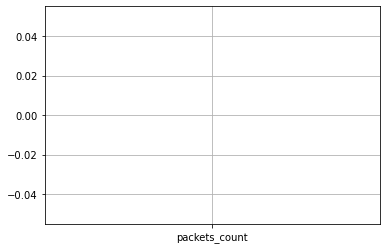

In [ ]:
outliers = get_outliers(df_sessions_numerical)
# df_ohne_outliers = drop_outliers(df_sessions_numerical, outliers[1])

### Корреляционный анализ

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Функция удаления выбросов (если это надо):
# [Параметры]
#   in_df - dataframe для проверки корреляции
#   in_columns - колонки, среди которых ищется корреляция
# [Выход]
#   correlated_features - коррелированные признаки
def get_correlated_features(in_f, in_columns=[]):
    correlated_features = []
    if len(in_columns):
        in_f = in_f[in_columns]
    correlation_matrix = in_f.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > 0.7:
                colname = correlation_matrix.columns[i]
                correlated_features.append(colname)
    print(correlated_features)
    return(correlated_features, correlation_matrix)

In [ ]:
corr_features, corr_matrix = get_correlated_features(df_sessions_numerical)

['end_time', 'total_fiat', 'total_biat', 'total_biat', 'b_pkts_num', 'max_fiat', 'max_fiat', 'max_fiat', 'max_biat', 'max_biat', 'max_biat', 'max_biat', 'mean_fiat', 'mean_fiat', 'mean_fiat', 'mean_fiat', 'mean_fiat', 'mean_biat', 'mean_biat', 'mean_biat', 'mean_biat', 'mean_biat', 'mean_biat', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_packets_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'flow_bytes_per_second', 'f_min_pkt_size', 'f_min_pkt_size', 'f_min_pkt_size', 'f_min_pkt_size', 'f_min_pkt_size', 'f_max_pkt_size', 'f_max_pkt_size', 'f_max_pkt_size', 'f_max_pkt_size', 'f_max_pkt_size', 'f_max_pkt_size', 'b_min_pkt_size', 'b_min_pkt_size', 'b_min_pkt_size', 'b_min_pkt_size', 'b_min_pkt_size', 'b_min_pkt_size', 'b_min_pk

<AxesSubplot:>

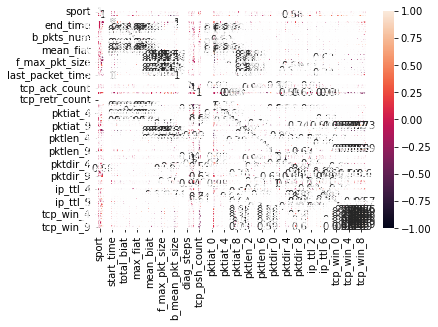

In [ ]:
sns.heatmap(data=corr_matrix, annot=True)

In [ ]:
drop_col = ["dport","sport","duration","start_time"]
df_sessions_numerical.drop(labels=drop_col,axis=1,inplace=True)


df_sessions_numerical.drop(labels=corr_features,axis=1,inplace=True)
df_sessions_numerical.columns.to_list()

df_sessions = df_sessions_numerical

/tmp/ipykernel_16900/3086325677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions_numerical.drop(labels=drop_col,axis=1,inplace=True)
/tmp/ipykernel_16900/3086325677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions_numerical.drop(labels=corr_features,axis=1,inplace=True)


## Обогащение

In [ ]:
print("Enrichment...")

Enrichment...


In [ ]:
enrich_dataframe(df_sessions)
enrich_dataframe(df_pktiat)
enrich_dataframe(df_pktlen)
enrich_dataframe(df_pktdir)
enrich_dataframe(df_ip_ttl)
enrich_dataframe(df_tcp_win)

## Save

In [ ]:
print('df_sessions.shape:', df_sessions.shape)
print('df_pktiat.shape:', df_pktiat.shape)
print('df_pktlen.shape:', df_pktlen.shape)
print('df_pktdir.shape:', df_pktdir.shape)
print('df_ip_ttl.shape:', df_ip_ttl.shape)
print('df_tcp_win.shape:', df_tcp_win.shape)

df_sessions.shape: (2335, 96)
df_pktiat.shape: (2335, 11)
df_pktlen.shape: (2335, 11)
df_pktdir.shape: (2335, 11)
df_ip_ttl.shape: (2335, 11)
df_tcp_win.shape: (2335, 11)


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_sessions.csv')

print("Saving file:", filename)

df_sessions.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_sessions.csv
File saved: ./sstp/df_final_sstpmaxp10_sessions.csv


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_pktiat.csv')

print("Saving file:", filename)

df_pktiat.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_pktiat.csv
File saved: ./sstp/df_final_sstpmaxp10_pktiat.csv


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_pktlen.csv')

print("Saving file:", filename)

df_pktlen.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_pktlen.csv
File saved: ./sstp/df_final_sstpmaxp10_pktlen.csv


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_pktdir.csv')

print("Saving file:", filename)

df_pktdir.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_pktdir.csv
File saved: ./sstp/df_final_sstpmaxp10_pktdir.csv


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_ip_ttl.csv')

print("Saving file:", filename)

df_ip_ttl.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_ip_ttl.csv
File saved: ./sstp/df_final_sstpmaxp10_ip_ttl.csv


In [ ]:
filename = os.path.join(current_path, df_final_suffix + '_tcp_win.csv')

print("Saving file:", filename)

df_tcp_win.to_csv(filename, index=False, header=True)

print("File saved:", filename)

Saving file: ./sstp/df_final_sstpmaxp10_tcp_win.csv
File saved: ./sstp/df_final_sstpmaxp10_tcp_win.csv
